In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [13]:
df = pd.read_csv('Dataset.csv')
df.replace('?',-9999, inplace=True)
df.drop('id', 1, inplace=True)#1 is axis. 1 for column, 0 for row drop
full_data = df.astype(float).values.tolist()

In [14]:
#df = pd.read_csv('Dataset.csv')

In [15]:
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,label
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [16]:
df.tail(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,label
689,1,1,1,1,2,1,1,1,8,2
690,1,1,1,3,2,1,1,1,1,2
691,5,10,10,5,4,5,4,4,1,4
692,3,1,1,1,2,1,1,1,1,2
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [17]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]} #2 & 4 is output data
test_set = {2:[], 4:[]}  #2 is for the benign tumors   4 is for malignant tumors,

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]


In [18]:
for i in train_data:  
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [27]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    #print(distances)
    #print(sorted(distances))
    #print(sorted(distances)[:k])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result   # 2,4

In [30]:
 def calc(k):
    correct = 0
    total=0
    for group in test_set:
        for data in test_set[group]:
            vote = k_nearest_neighbors(train_set, data, k)
            if group == vote: 
                correct += 1
            total += 1
    u = correct/total
    return u
print("Accuracy: ",u)

Accuracy:  1


In [29]:
k=[]
acc=[]
for a in range(1,100,2):
    acc.append(calc(a))
    k.append(a)

/home/sambbhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: K is set to a value less than total voting groups!
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
print(k)
print("")
print(acc)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]

[0.9712230215827338, 0.9424460431654677, 0.9424460431654677, 0.9424460431654677, 0.9424460431654677, 0.9424460431654677, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9424460431654677, 0.9424460431654677, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9496402877697842, 0.9424460431654677, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.935251798561151, 0.9280575539568345, 0.935251798561151, 0.935251798561151, 0

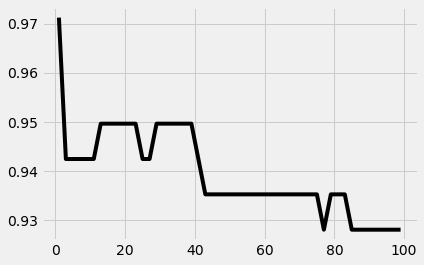

In [217]:
plt.plot(k,acc,color='#000000')

plt.show()